In [28]:
from robustcontrol import utils
from robustcontrol import utilsplot
import numpy as np
import matplotlib.pyplot as plt
import scipy
import control

In [143]:
# mpl.rcParams['figure.facecolor'] = 'white'

s = utils.tf([1, 0], 1)

A = np.matrix([[-10, 0], [0, -1]])
B = np.eye(A.shape[0])
C = np.matrix([[10., 1.1], [10., 0]])
D = np.matrix([[0., 0.], [0., 1.]])
I = np.eye(A.shape[0])

G = utils.mimotf(C*utils.mimotf(s*I - A).inverse()*B + D)
G


mimotf([[tf([10.], [ 1. 10.]) tf([1.1], [1. 1.])]
 [tf([10.], [ 1. 10.]) tf([1.], [1.])]])

# a) Controllability analysis

In [26]:
z = [round(zi, 3) for zi in utils.zeros(G)]
# G has a LHP zero @ -10, -1 and a RHP zero @ 0.1 which limits bandwidth to wB* < 0.05

p = [round(pi, 3) for pi in utils.poles(G)]
# G has stable poles: -10 with multiplicity of 2 and -1

print('Zeros are:', z)
print('Poles are:', p)

Zeros are: [0.1, -10.0, -1.0]
Poles are: [-10.0, -1.0]


In [142]:
a = 0
M = 2
wb = (1 - 1/M)/(1 - a)
wb

0.5

In [108]:
w = np.logspace(-2, 1, 1000)
s = 1j*w

def G(s):
    return np.matrix([[10/(s + 10), 1.1/(s + 1)], [10/(s + 10), 1]])
def g11(s):
    return 10/(s + 10)
def g12(s):
    return 1.1/(s + 1)
def g21(s):
    return 10/(s + 10)
def g22(s):
    return 1

def λ_11(s):
    return 1/(1 - ((g12(s)*g21(s))/(g11(s)*g22(s))))


λ11= np.array([λ_11(i) for i in s])
λ21 = 1 - λ11

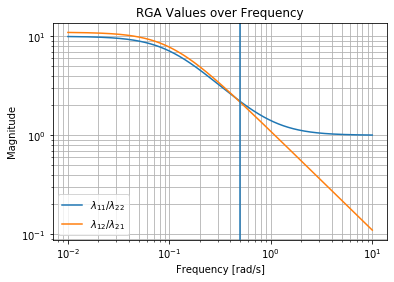

In [104]:
plt.figure(1)
plt.title('RGA Values over Frequency')
plt.xlabel(r'Frequency [rad/s]')
plt.ylabel(r'Magnitude')
plt.loglog(w, abs(λ11), label='$\lambda_{11}/\lambda_{22}$')
plt.loglog(w, abs(λ21), label='$\lambda_{12}/\lambda_{21}$')
plt.axvline(0.5)
plt.grid(b=None, which='both', axis='both')
plt.legend(loc=3)

##### RGA Number of Off-diagonal pairing exhibits the lowest RGA Number for w < wB*

# b) Disturbance rejection and input saturation

In [187]:
G0 = G(0)
G0

matrix([[1. , 1.1],
        [1. , 1. ]])

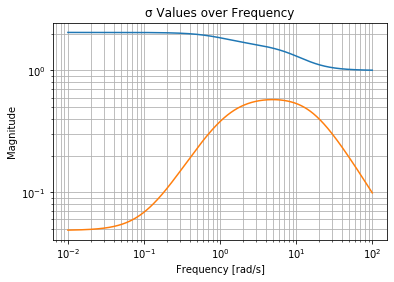

array([-0.68922507,  0.72454731])

In [176]:
w = np.logspace(-2, 2, 1000)
s = 1j*w

Gjw = map(G, s)
σ = np.array([Σ for U, Σ, V in map(np.linalg.svd, Gjw)])

plt.figure(2)
plt.title('σ Values over Frequency')
plt.xlabel(r'Frequency [rad/s]')
plt.ylabel(r'Magnitude')
plt.loglog(w, σ)
plt.grid(b=None, which='both', axis='both')
plt.show()

U, Σ, V = np.linalg.svd(G(0))
umin = np.array(U[1])[0]
umin

In [177]:
import sympy
k = sympy.symbols('k')
d = np.matrix([1, k]).T
gd0 = -B*np.linalg.inv(A)*d
gd0


matrix([[0.100000000000000],
        [1.0*k]], dtype=object)

In [181]:
#in the most difficult direction:
ans = sympy.solve(umin[0]/umin[1] - (1 + 1.1*k), k)
ans[0]

-1.77386292702276

# c) Decentralized control

The off-diagonal pairing exhibits the lowest RGA number over the bandwidth frequency (see figure 1)

Also steady state RGA gives negative values on the diagonal

In [186]:
s = sympy.symbols('s')
round(λ_11(0)), round(1 - λ_11(0))


(-10, 11)